In [89]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display


In [90]:
x, sr = librosa.load('/home/kumpaka/Desktop/Songs/simplebeat.wav')
ipd.Audio(x, rate=sr)


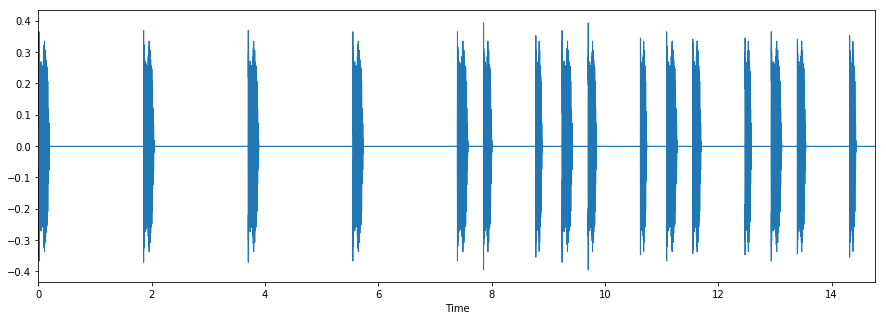

In [91]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(x, sr=sr)

In [92]:
onset_frames = librosa.onset.onset_detect(x, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
print(onset_frames) #frame numbers of estimated onsets


[ 80 160 239 319 339 378 398 418 458 478 498 537 557 577 617]


In [93]:
onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)


[ 1.85759637  3.71519274  5.54956916  7.40716553  7.87156463  8.77714286
  9.24154195  9.70594104 10.63473923 11.09913832 11.56353741 12.46911565
 12.93351474 13.39791383 14.32671202]


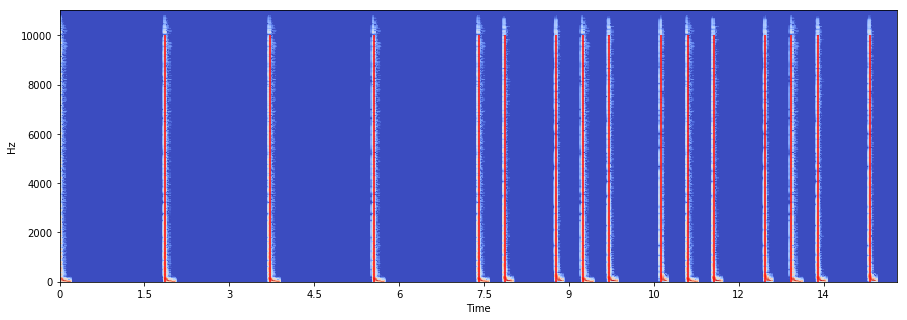

In [94]:
s = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(s))
plt.figure(figsize=(15,5))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='hz')
plt.vlines(onset_times, ymin=-0, ymax=10000, color='r', linestyles='solid')

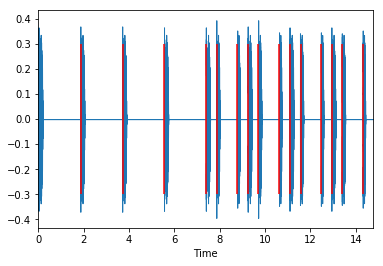

In [95]:
librosa.display.waveplot(x, sr=sr)
plt.vlines(onset_times, ymin=-0.3, ymax=0.3, color='r', linestyles='solid')


In [96]:
clicks = librosa.clicks(frames=onset_frames, sr=sr, length=len(x))
ipd.Audio(numpy.vstack([x, clicks]), rate=sr)